# Eigenmodes

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

def filter_sort_eig(eigvals, eigfuns):
    # Filter the slow-decaying modes (these are usually the non-spurious ones)
    idx_filtered = np.abs(np.imag(eigvals)) > 0.5*np.abs(np.real(eigvals))
    eigvals = eigvals[idx_filtered]
    eigfuns = eigfuns[:, idx_filtered]
    # Sort by real part, and then by imaginary part
    idx_sorted = sorted(list(range(eigvals.size)), key=lambda i: (-np.real(eigvals[i]), np.abs(np.imag(eigvals[i]))))
    eigvals = eigvals[idx_sorted]
    eigfuns = eigfuns[:, idx_sorted]
    return eigvals, eigfuns

## Plot eigenmodes - FEM

In [135]:
with h5py.File("./output/eigenmodes_n50_v2.h5", 'r') as f:
    xcoord = f["nodes"][()]
    eigvals = f["eigenvals"][()]
    eigfuns = f["eigenfuns"][()]

In [124]:
idx_filtered = np.abs(np.imag(eigvals)/np.real(eigvals)) > .5
eigvals = eigvals[idx_filtered]
eigfuns = eigfuns[:, idx_filtered]

In [125]:
idx_argsort = np.argsort(np.abs(np.imag(eigvals)))
eigvals = eigvals[idx_argsort]
eigfuns = eigfuns[:, idx_argsort]

In [136]:
eigvals

array([-7.48740345e+01 +0.j        , -7.44693484e+01 +0.j        ,
       -7.37896390e+01 +0.j        , -7.28422843e+01 +0.j        ,
       -7.16389189e+01 +0.j        , -7.01941441e+01 +0.j        ,
       -6.85247956e+01 +0.j        , -6.66492541e+01 +0.j        ,
       -6.45867527e+01 +0.j        , -6.23566895e+01 +0.j        ,
       -5.99779510e+01 +0.j        , -5.74682507e+01 +0.j        ,
       -5.48434690e+01 +0.j        , -5.21169618e+01 +0.j        ,
       -4.92987694e+01 +0.j        , -4.63946002e+01 +0.j        ,
       -4.34043455e+01 +0.j        , -4.03196242e+01 +0.j        ,
       -3.71192237e+01 +0.j        , -3.37594715e+01 +0.j        ,
       -3.01501200e+01 +0.j        , -2.60746910e+01 +0.j        ,
       -2.06948714e+01 +0.j        , -1.64369366e+01-11.69719646j,
       -1.64369366e+01+11.69719646j, -1.64284935e+01+10.02887103j,
       -1.64284935e+01-10.02887103j, -1.63744657e+01+13.25616349j,
       -1.63744657e+01-13.25616349j, -1.63136369e+01 -8.194934

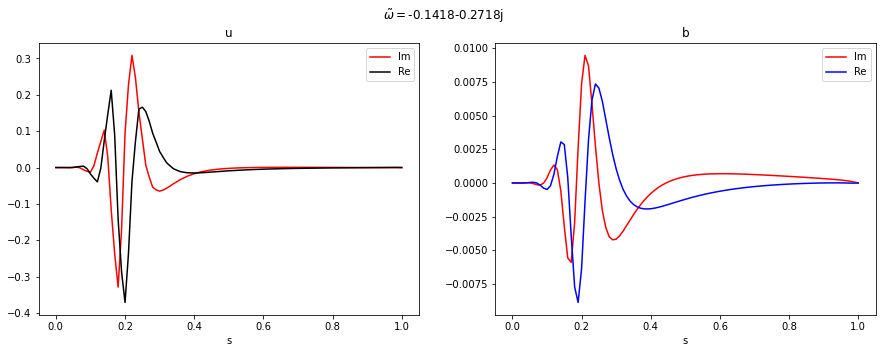

In [134]:
idx = 15

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax = axes[0]
ax.plot(xcoord, np.imag(eigfuns[0::2, idx]), 'r-', label="Im")
ax.plot(xcoord, np.real(eigfuns[0::2, idx]), 'k-', label="Re")
ax.legend()
ax.set_xlabel("s")
ax.set_title("u")

ax = axes[1]
ax.plot(xcoord, np.imag(eigfuns[1::2, idx]), 'r-', label="Im")
ax.plot(xcoord, np.real(eigfuns[1::2, idx]), 'b-', label="Re")
ax.legend()
ax.set_xlabel("s")
ax.set_title("b")

fig.suptitle(r"$\tilde{\omega}=$" + "{:.4f}".format(eigvals[idx]))

plt.show()

## Plot eigenmodes - Spectral

In [56]:
import scipy.special as specfun
from spectral import basis

with h5py.File("./output/eigenmodes_Pm0_cheby50.h5", 'r') as f:
    degrees = f["degrees"][()]
    eigvals = f["eigenvals"][()]
    eigfuns = f["eigenfuns"][()]

In [57]:
eigvals, eigfuns = filter_sort_eig(eigvals, eigfuns)

In [58]:
eigvals

array([-0.01679284 +0.68673024j, -0.01679284 -0.68673024j,
       -0.07752279 -0.83286503j, -0.07752279 +0.83286503j,
       -0.14996108 -1.03676239j, -0.14996108 +1.03676239j,
       -0.22894237 -1.27399302j, -0.22894237 +1.27399302j,
       -0.31252743 -1.53161768j, -0.31252743 +1.53161768j,
       -0.40069261 -1.80224367j, -0.40069261 +1.80224367j,
       -0.4947876  -2.0816243j , -0.4947876  +2.0816243j ,
       -0.60052979 +2.36919843j, -0.60052979 -2.36919843j,
       -0.72428099 +2.7167497j , -0.72428099 -2.7167497j ,
       -0.74920069 -3.05515996j, -0.74920069 +3.05515996j,
       -0.78423279 +3.37297085j, -0.78423279 -3.37297085j,
       -0.81902865 -3.69956765j, -0.81902865 +3.69956765j,
       -0.84815603 -2.60623356j, -0.84815603 +2.60623356j,
       -0.85697003 -4.04043518j, -0.85697003 +4.04043518j,
       -0.89526077 +4.39478742j, -0.89526077 -4.39478742j,
       -0.93725501 -4.76680225j, -0.93725501 +4.76680225j,
       -0.98225748 +5.15229593j, -0.98225748 -5.15229593

In [60]:
xi = np.linspace(-1, 1, num=100)
cheby_eval = basis.ChebyshevTSpace(np.arange(50), xi)

In [67]:
eigfuns[50:, 0]/np.abs(eigfuns[50, 0])

array([-1.00000000e+00+0.j,  1.10235397e+00+0.j, -5.41491400e-04+0.j,
        4.71882948e-01+0.j, -9.01192204e-04+0.j,  1.03808931e-03+0.j,
        2.24881524e-05+0.j, -3.68506586e-04+0.j, -6.42325651e-04+0.j,
        3.27683118e-04+0.j, -1.02327176e-03+0.j,  1.04528051e-03+0.j,
        5.19215830e-04+0.j, -2.85982932e-04+0.j,  7.47499980e-04+0.j,
       -9.48805797e-04+0.j,  1.47812854e-04+0.j, -4.68425998e-04+0.j,
        9.20249991e-05+0.j, -4.56040144e-04+0.j,  1.73633772e-04+0.j,
       -6.95908541e-04+0.j,  7.88801350e-04+0.j,  2.11715833e-04+0.j,
        3.07110571e-05+0.j,  5.36497467e-04+0.j, -4.08694158e-04+0.j,
       -5.80801661e-04+0.j,  5.40770818e-04+0.j, -2.22769734e-04+0.j,
        2.57431016e-04+0.j, -4.25995793e-04+0.j, -1.32620485e-04+0.j,
        2.97006838e-04+0.j, -3.38821714e-04+0.j,  4.56066184e-04+0.j,
       -4.09069715e-04+0.j,  3.49618758e-04+0.j, -4.33701401e-04+0.j,
       -2.12136545e-04+0.j,  6.34040532e-05+0.j, -2.18592669e-04+0.j,
        3.05589389e-

In [49]:
eigenmodes_u = np.array([np.sum(basis*eigfuns[:50, i], axis=-1) for i in range(74)])
eigenmodes_b = np.array([np.sum(basis*eigfuns[50:, i], axis=-1) for i in range(74)])

In [ ]:
def assemble_spectral_funcs(degrees, xcoord, coeffs):
    cheby_eval = basis.ChebyshevTSpace(degrees, xcoord)
    eigenmodes = np.zeros((2*xcoord.size, coeffs.shape[1]), dtype=np.complex128)
    eigenmodes[::2, :] = np.array([cheby_eval(coeffs[:degrees.size, i]) for i in range(coeffs.shape[1])]).T
    eigenmodes[1::2, :] = np.array([cheby_eval(coeffs[degrees.size:, i]) for i in range(coeffs.shape[1])]).T
    return eigenmodes

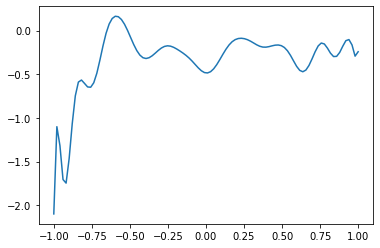

In [55]:
plt.plot(xi, np.real(eigenmodes_u[4, :]))
plt.show()

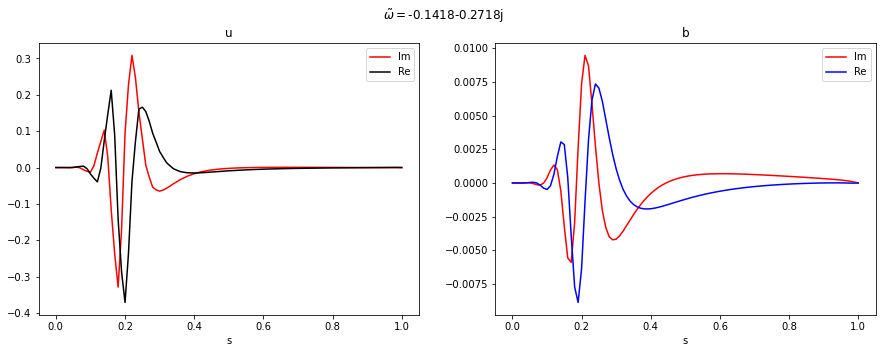

In [134]:
idx = 15

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax = axes[0]
ax.plot(xcoord, np.imag(eigfuns[0::2, idx]), 'r-', label="Im")
ax.plot(xcoord, np.real(eigfuns[0::2, idx]), 'k-', label="Re")
ax.legend()
ax.set_xlabel("s")
ax.set_title("u")

ax = axes[1]
ax.plot(xcoord, np.imag(eigfuns[1::2, idx]), 'r-', label="Im")
ax.plot(xcoord, np.real(eigfuns[1::2, idx]), 'b-', label="Re")
ax.legend()
ax.set_xlabel("s")
ax.set_title("b")

fig.suptitle(r"$\tilde{\omega}=$" + "{:.4f}".format(eigvals[idx]))

plt.show()

## Compare eigenmodes

In [17]:
with h5py.File("./output/eigenmodes_n50_v2.h5", 'r') as f:
    eigen_0 = f["eigenvals"][()]
with h5py.File("./output/eigenmodes_n50_quad5.h5", 'r') as f:
    eigen_1 = f["eigenvals"][()]
with h5py.File("./output/eigenmodes_n50_quad6.h5", 'r') as f:
    eigen_2 = f["eigenvals"][()]

idx_filtered = np.abs(np.imag(eigen_0)/np.real(eigen_0)) > .5
eigen_0 = eigen_0[idx_filtered]
idx_argsort = np.argsort(np.abs(np.imag(eigen_0)))
eigen_0 = eigen_0[idx_argsort]

idx_filtered = np.abs(np.imag(eigen_1)/np.real(eigen_1)) > .5
eigen_1 = eigen_1[idx_filtered]
idx_argsort = np.argsort(np.abs(np.imag(eigen_1)))
eigen_1 = eigen_1[idx_argsort]

idx_filtered = np.abs(np.imag(eigen_2)/np.real(eigen_2)) > .5
eigen_2 = eigen_2[idx_filtered]
idx_argsort = np.argsort(np.abs(np.imag(eigen_2)))
eigen_2 = eigen_2[idx_argsort]

for i in range(50):
    print("{:.10e} {:.10e} {:.10e}".format(eigen_0[i], eigen_1[i], eigen_2[i]))

-1.6814902119e-02+6.8674455466e-01j -1.6814902119e-02+6.8674455466e-01j -1.6814902119e-02+6.8674455466e-01j
-1.6814902119e-02-6.8674455466e-01j -1.6814902119e-02-6.8674455466e-01j -1.6814902119e-02-6.8674455466e-01j
-7.7707938551e-02+8.3301073476e-01j -7.7707938551e-02-8.3301073476e-01j -7.7707938551e-02-8.3301073476e-01j
-7.7707938551e-02-8.3301073476e-01j -7.7707938551e-02+8.3301073476e-01j -7.7707938551e-02+8.3301073476e-01j
-1.5049224010e-01+1.0372156529e+00j -1.5049224010e-01+1.0372156529e+00j -1.5049224010e-01+1.0372156529e+00j
-1.5049224010e-01-1.0372156529e+00j -1.5049224010e-01-1.0372156529e+00j -1.5049224010e-01-1.0372156529e+00j
-2.2998790464e-01+1.2749351003e+00j -2.2998790464e-01+1.2749351003e+00j -2.2998790464e-01+1.2749351003e+00j
-2.2998790464e-01-1.2749351003e+00j -2.2998790464e-01-1.2749351003e+00j -2.2998790464e-01-1.2749351003e+00j
-3.1424033850e-01-1.5331757163e+00j -3.1424033850e-01+1.5331757163e+00j -3.1424033850e-01+1.5331757163e+00j
-3.1424033850e-01+1.53317571

In [27]:
eigen_1 - eigen_2

array([ 1.22322291e-13-7.98250355e-14j,  1.22322291e-13+7.98250355e-14j,
        2.05946371e-14-7.17204074e-14j,  2.05946371e-14+7.17204074e-14j,
       -9.63673585e-14+9.54791801e-14j, -9.63673585e-14-9.54791801e-14j,
       -3.11639603e-13-6.92779167e-14j, -3.11639603e-13+6.92779167e-14j,
       -2.18713936e-14-5.64215341e-13j, -2.18713936e-14+5.64215341e-13j,
        6.34381436e-13+1.77635684e-15j,  6.34381436e-13-1.77635684e-15j,
        6.64579503e-13+2.57571742e-14j,  6.64579503e-13-2.57571742e-14j,
        4.27435864e-14+4.66293670e-13j,  4.27435864e-14-4.66293670e-13j,
        1.52193813e-11+1.19091403e-11j,  1.52193813e-11-1.19091403e-11j,
       -8.46456238e-12-1.02883924e-10j, -8.46456238e-12+1.02883924e-10j,
        3.18456372e-11+1.00852660e-10j,  3.18456372e-11-1.00852660e-10j,
       -5.26922950e-11+1.37636569e-11j, -5.26922950e-11-1.37636569e-11j,
       -3.46944695e-13-3.25766081e-11j, -3.46944695e-13+3.25766081e-11j,
        1.59396940e-11-1.15463195e-14j,  1.59396940

In [3]:
a_test = np.array([np.array([1, 2, 3])]*100).T
b_test = np.array([np.array([1, 2, 3])]*100).T
print(a_test.shape, b_test.shape)

(3, 100) (3, 100)


In [13]:
result = a_test[:, np.newaxis, :]*b_test[np.newaxis, :, :]
result[:, :, 1]

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])